In [1]:
# Import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Excel data file into a Pandas DataFrame
# The excel file is in the same directory of this notebook, so at here we use relative path
df = pd.read_excel("Sample - Superstore.xls")

In [3]:
# Display 05 of first rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
used_columns = ["Order Date", "Region", "Category", "City", "State", "Sub-Category", "Ship Mode", 
                 "Product Name", "Product ID", "Sales", "Quantity", "Discount", "Profit"]
df = df[used_columns]

In [5]:
# Display data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9994 non-null   datetime64[ns]
 1   Region        9994 non-null   object        
 2   Category      9994 non-null   object        
 3   City          9994 non-null   object        
 4   State         9994 non-null   object        
 5   Sub-Category  9994 non-null   object        
 6   Ship Mode     9994 non-null   object        
 7   Product Name  9994 non-null   object        
 8   Product ID    9994 non-null   object        
 9   Sales         9994 non-null   float64       
 10  Quantity      9994 non-null   int64         
 11  Discount      9994 non-null   float64       
 12  Profit        9994 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 1015.1+ KB


In [6]:
# Current format of Order Date: datetime64[ns]
# Need to be converted into datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

Now, dataframe is in a good format
There is no NULL data (no missing data in the df)

In [7]:
df.Profit

0        41.9136
1       219.5820
2         6.8714
3      -383.0310
4         2.5164
          ...   
9989      4.1028
9990     15.6332
9991     19.3932
9992     13.3200
9993     72.9480
Name: Profit, Length: 9994, dtype: float64

# Examine the Profit data at first 

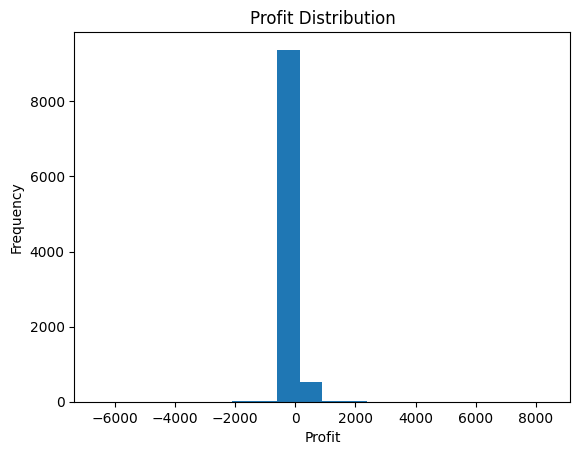

In [8]:
# Plot the profit distribution 
plt.hist(df['Profit'], bins=20)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Profit Distribution')
plt.show()

# What can you see on this plot? 

In [9]:
# SUM of profit
sum = df.Profit.sum()
print(f"Profit Summary: {sum}")
print(f"Profit max: {df.Profit.max()}")
print(f"Profit min: {df.Profit.min()}")

Profit Summary: 286397.0216999999
Profit max: 8399.975999999999
Profit min: -6599.978000000001


In [10]:
# Examine the time range in the "Order date" column

latest_order_date = df['Order Date'].max()
earliest_order_date = df['Order Date'].min()
print(f"Time range: from {earliest_order_date} to {latest_order_date}")



Time range: from 2018-01-03 00:00:00 to 2021-12-30 00:00:00


# what is your conclusion about the summary of profit over 3 years?

In [11]:
# Check profit by product 
# Group the sale data based on "Product ID" and "Product Name" then calculate the sum of profit for each group
profit_group = df.groupby(['Product ID', 'Product Name'])['Profit'].sum().reset_index()
# Sort the profit_group as descending
profit_group = profit_group.sort_values(by='Profit', ascending=False)

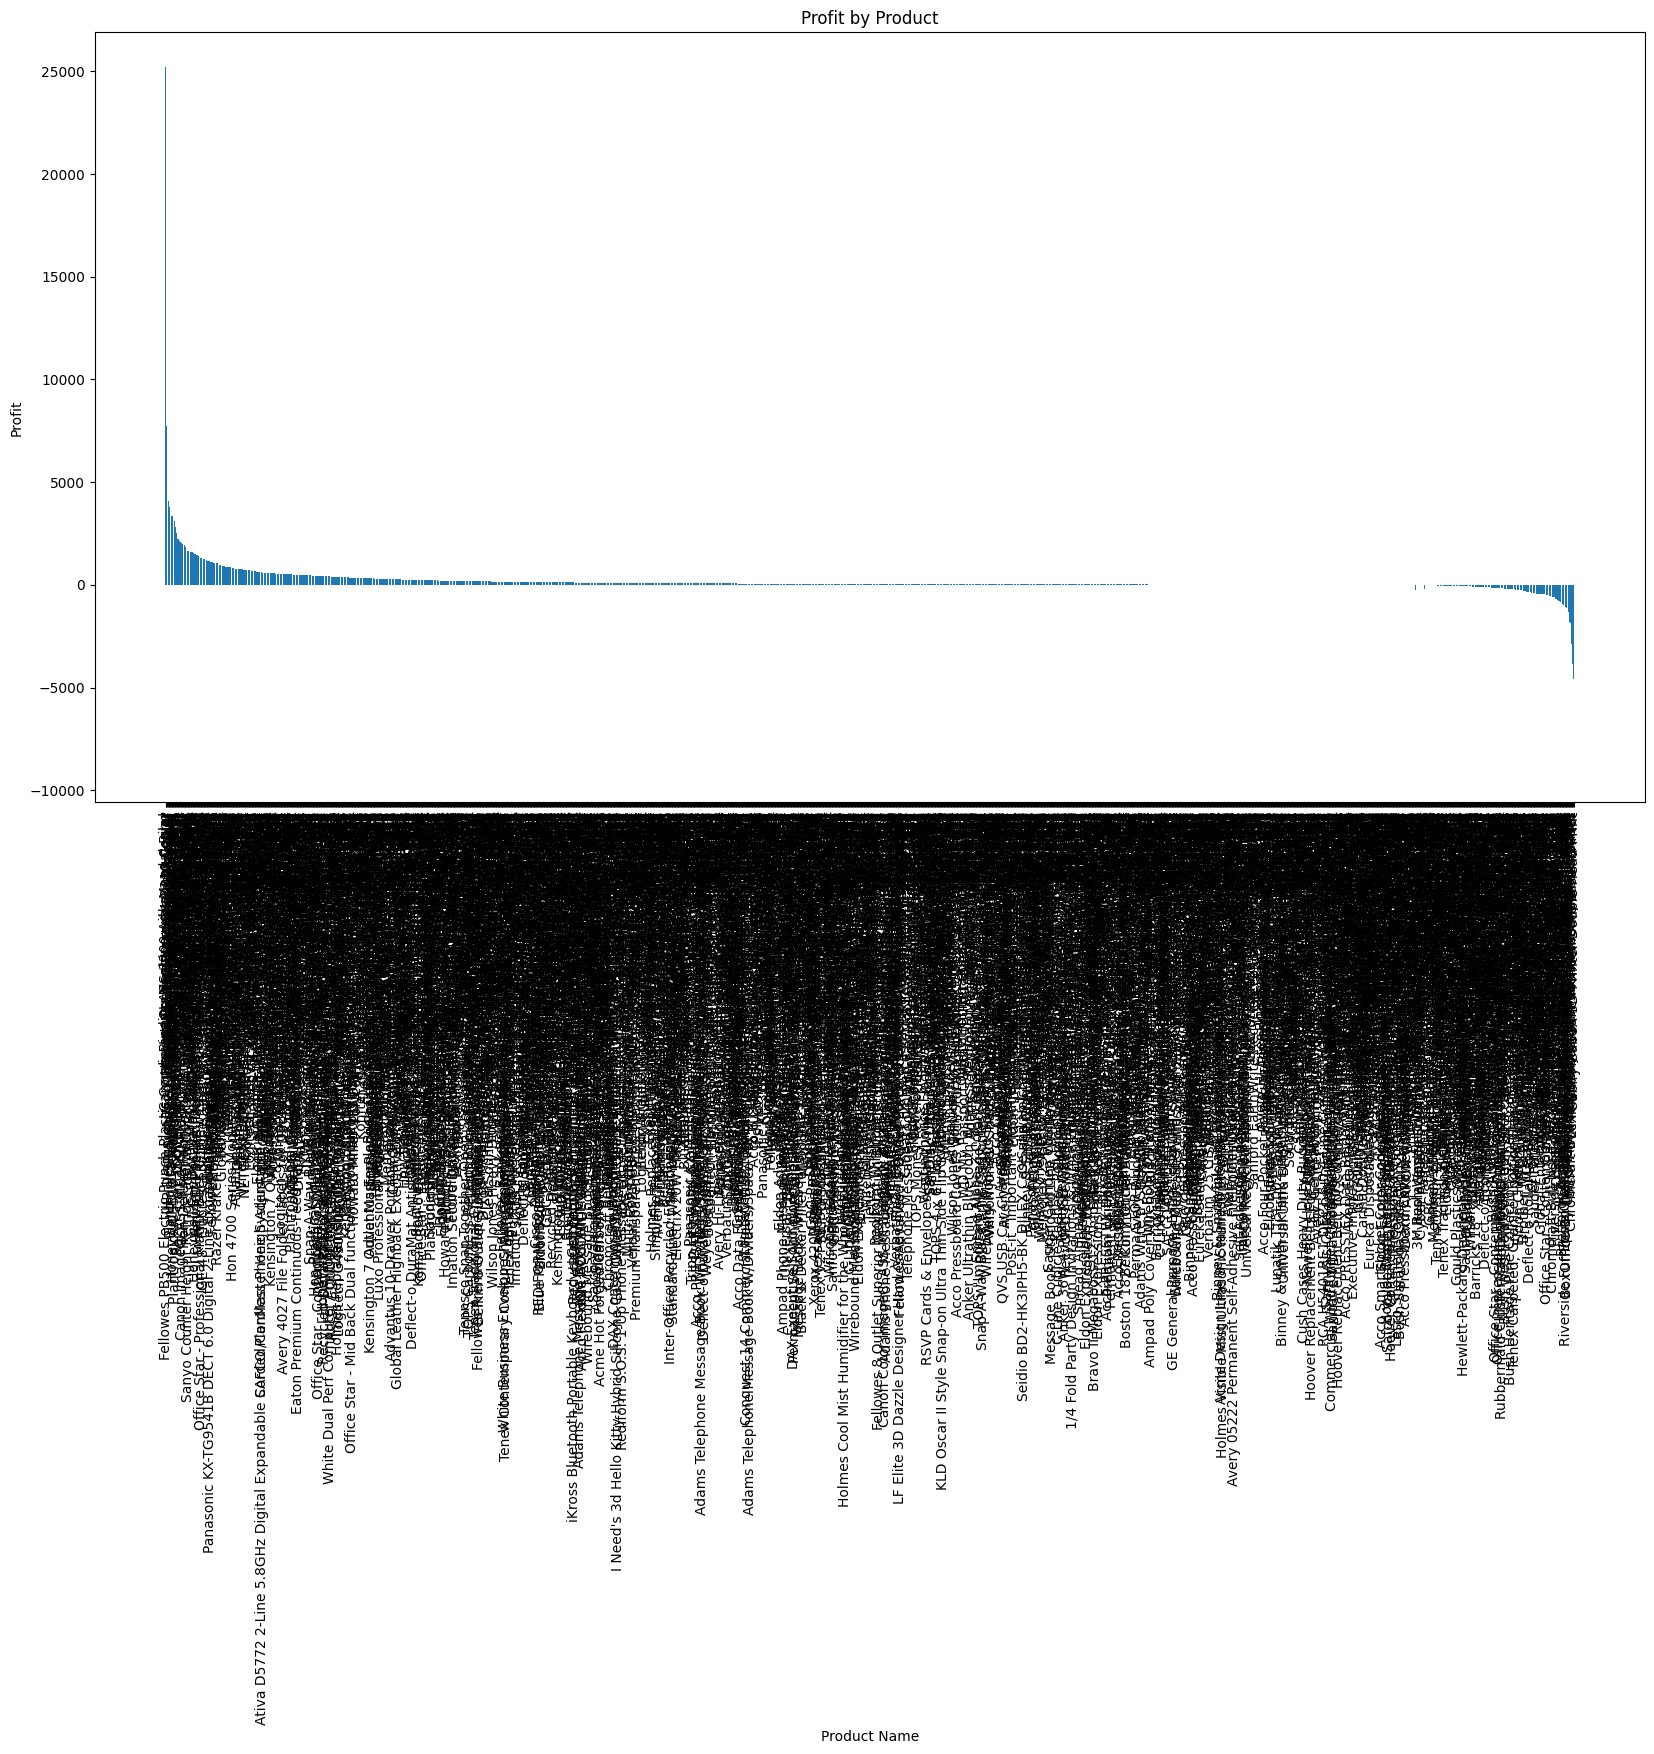

In [12]:
# Visualize the profit group
plt.figure(figsize=(20,10))
plt.bar(profit_group['Product Name'], profit_group['Profit'])
plt.xlabel('Product Name')
plt.ylabel('Profit')
plt.title('Profit by Product')
plt.xticks(rotation=90)
plt.show()

### NOT good in visualization

In [13]:
# Display top 10
top_profit = profit_group.head(10)
top_profit

,Product ID,Product Name,Profit
1640,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,25199.9280
787,OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
1630,TEC-CO-10001449,Hewlett Packard LaserJet 3310 Copier,6983.8836
1637,TEC-CO-10003763,Canon PC1060 Personal Laser Copier,4570.9347
1657,TEC-MA-10001127,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766
1693,TEC-MA-10003979,Ativa V4110MDD Micro-Cut Shredder,3772.9461
1656,TEC-MA-10001047,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
1541,TEC-AC-10002049,Plantronics Savi W720 Multi-Device Wireless He...,3696.2820
692,OFF-BI-10001120,Ibico EPK-21 Electric Binding System,3345.2823
1643,TEC-MA-10000045,Zebra ZM400 Thermal Label Printer,3343.5360


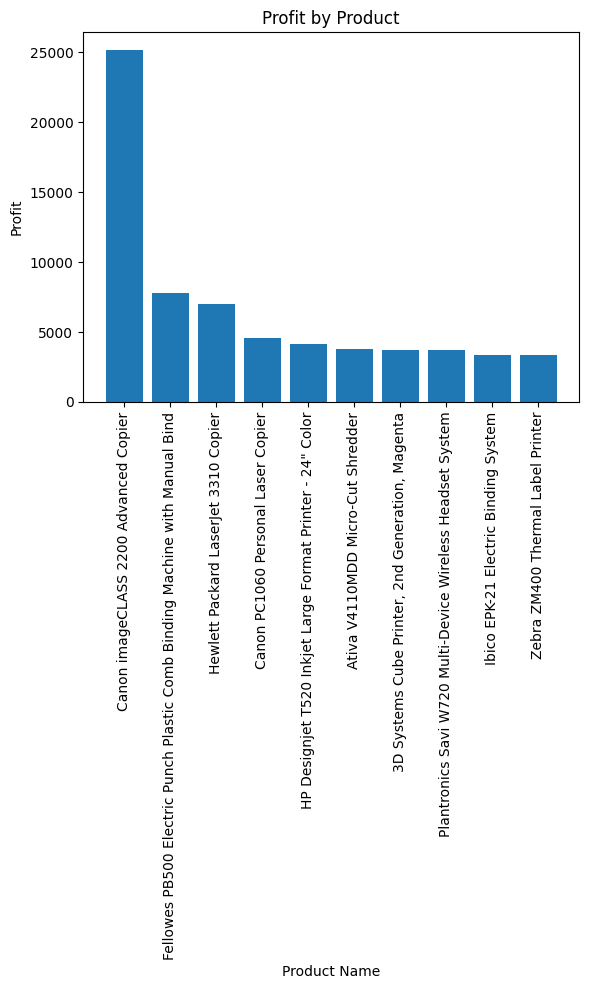

In [14]:
# Visualize the profit group
# plt.figure(figsize=(16,8))
plt.bar(top_profit['Product Name'], top_profit['Profit'])
plt.xlabel('Product Name')
plt.ylabel('Profit')
plt.title('Profit by Product')
plt.xticks(rotation=90)
plt.show()

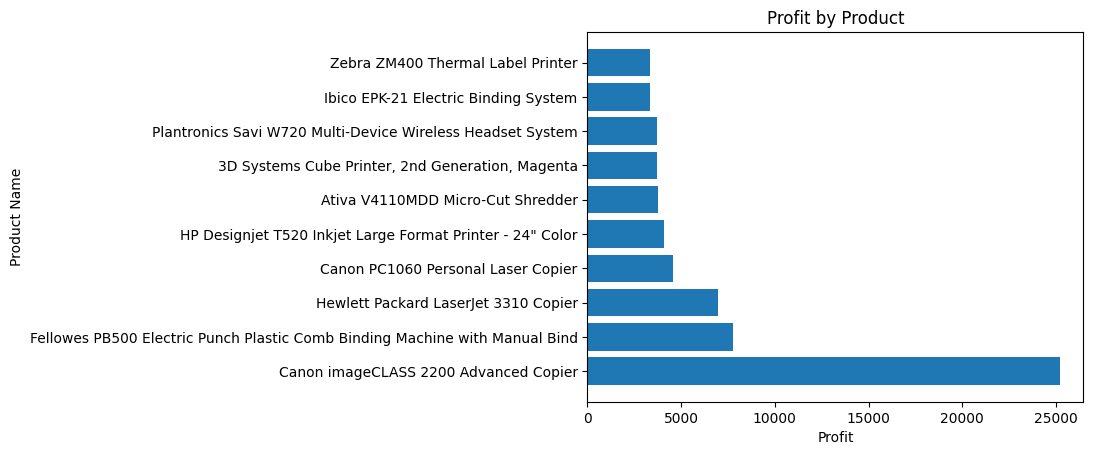

In [15]:
# or bar in horizontal 
plt.barh(top_profit['Product Name'], top_profit['Profit'])
plt.xlabel('Profit')
plt.ylabel('Product Name')
plt.title('Profit by Product')
plt.show()

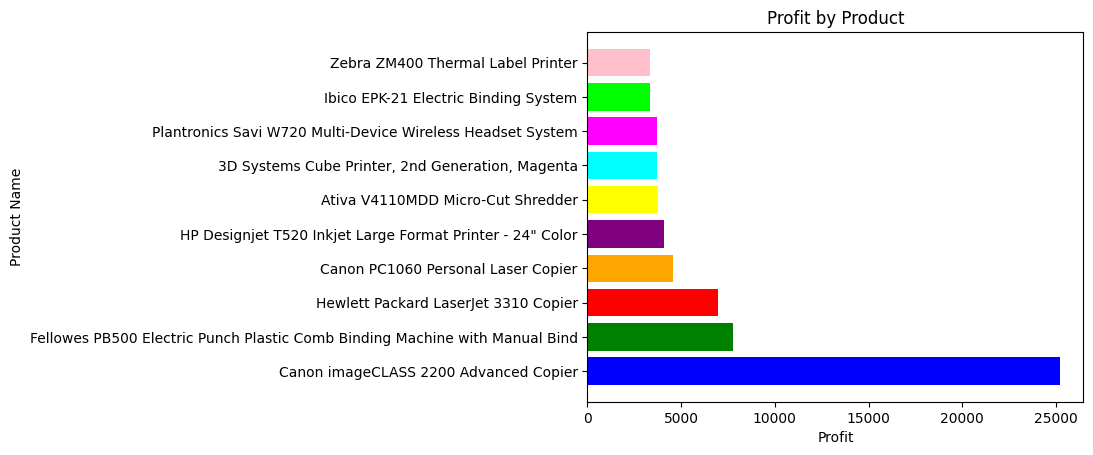

In [16]:
# Visualize the top_profit with barh chart with colors
colors = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink']

plt.barh(top_profit['Product Name'], top_profit['Profit'], color=colors)
plt.xlabel('Profit')
plt.ylabel('Product Name')
plt.title('Profit by Product')
plt.show()

In [17]:
# most negative profit
bottom_10 = profit_group.tail(10)

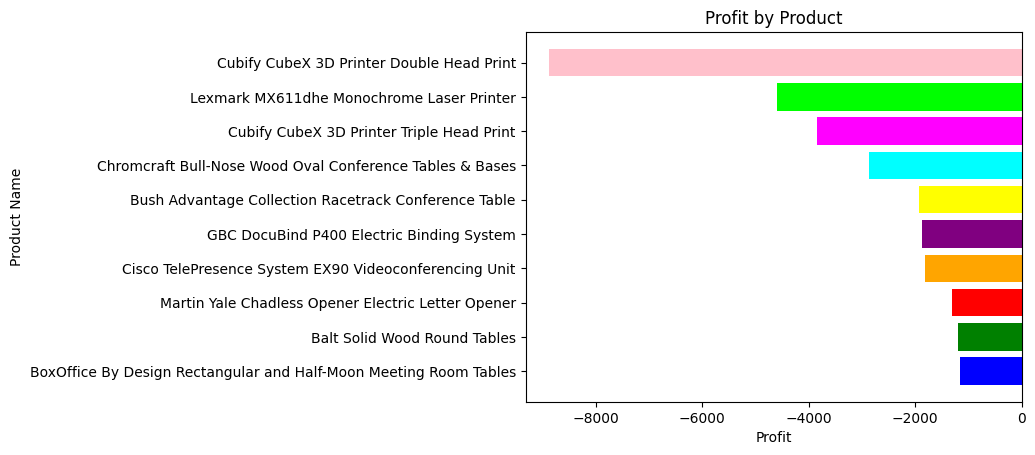

In [18]:
# Visualize the bottom_10 with barh chart with colors
colors = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink']

plt.barh(bottom_10['Product Name'], bottom_10['Profit'], color=colors)
plt.xlabel('Profit')
plt.ylabel('Product Name')
plt.title('Profit by Product')
plt.show()

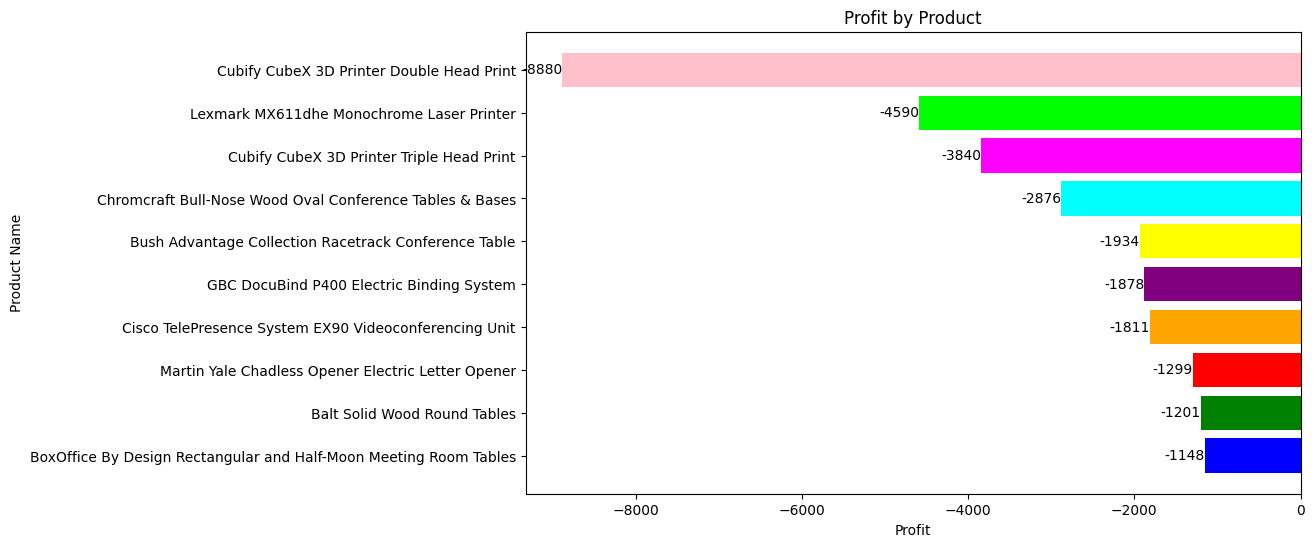

In [19]:
# Visualize the bottom_10 with barh chart with colors and bar label
colors = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink']

plt.figure(figsize=(10, 6))
bar_container = plt.barh(bottom_10['Product Name'], bottom_10['Profit'], color=colors)
plt.xlabel('Profit')
plt.ylabel('Product Name')
plt.title('Profit by Product')
plt.bar_label(bar_container, fmt="%.0f")
plt.show()

# Do the same for Sales data

In [20]:
# Group the sale data based on "Product ID" and "Product Name" then calculate the sum of sales for each group
sales_group = df.groupby(['Product ID', 'Product Name'])['Sales'].sum().reset_index()
# Sort the sales_group as descending
sales_group = sales_group.sort_values(by='Sales', ascending=False)

In [21]:
# display top 10 
top_sales = sales_group.head(10)
top_sales

,Product ID,Product Name,Sales
1640,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,61599.824
787,OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
1669,TEC-MA-10002412,Cisco TelePresence System EX90 Videoconferenci...,22638.480
82,FUR-CH-10002024,HON 5400 Series Task Chairs for Big and Tall,21870.576
701,OFF-BI-10001359,GBC DocuBind TL300 Electric Binding System,19823.479
667,OFF-BI-10000545,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
1630,TEC-CO-10001449,Hewlett Packard LaserJet 3310 Copier,18839.686
1657,TEC-MA-10001127,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
858,OFF-BI-10004995,GBC DocuBind P400 Electric Binding System,17965.068
1443,OFF-SU-10000151,High Speed Automatic Electric Letter Opener,17030.312


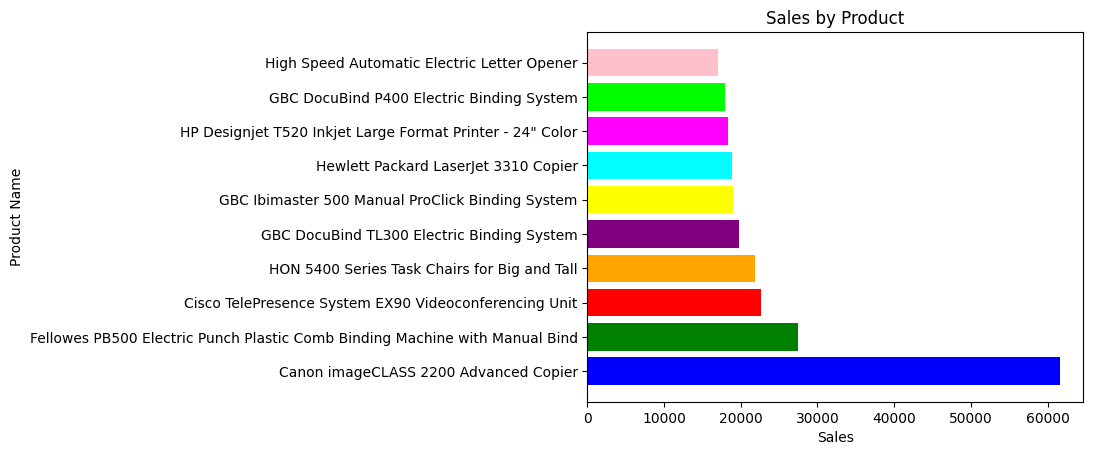

In [22]:
# Visualize the top_sale with barh chart with colors
colors = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink']

plt.barh(top_sales['Product Name'], top_sales['Sales'], color=colors)
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.title('Sales by Product')
plt.show()

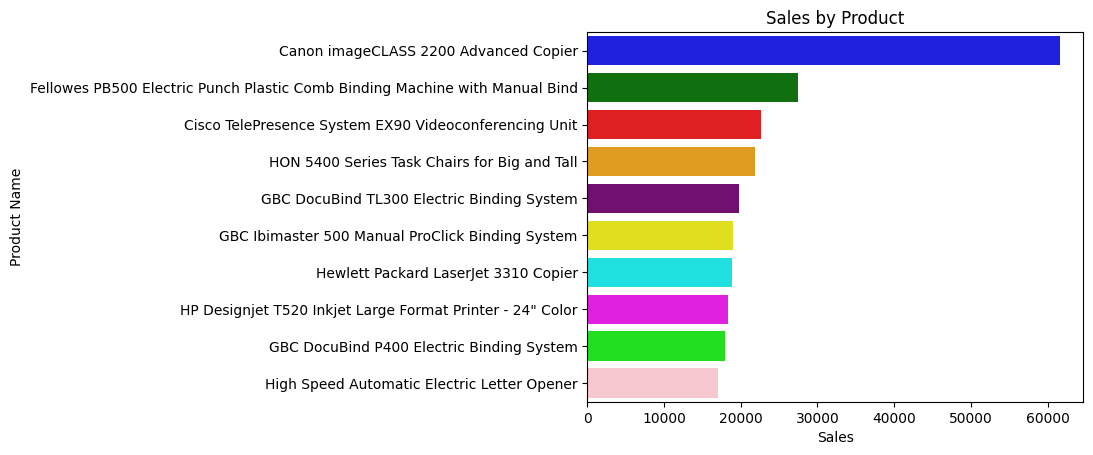

In [23]:
# We can use the Seaborn insted of Matplotlib
colors = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'pink']

# sns.barplot(data=top_sales, y='Product Name', x='Sales', palette=colors)
sns.barplot(data=top_sales, y='Product Name', x='Sales', hue='Product Name', palette=colors)
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.title('Sales by Product')
plt.show()

# Examine Profit by Category

In [24]:
df.Category.value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [25]:
profit_cat_group = df.groupby('Category')['Profit'].sum().reset_index()
profit_cat_group = profit_cat_group.sort_values(by="Profit", ascending=False)
profit_cat_group

,Category,Profit
2,Technology,145454.9481
1,Office Supplies,122490.8008
0,Furniture,18451.2728


Text(0.5, 1.0, 'Profit by Category')

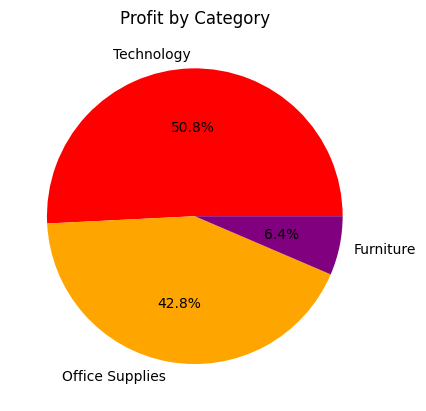

In [26]:
# Plot Profit with Pie chart
plt.pie(profit_cat_group["Profit"], labels=profit_cat_group["Category"], colors=['red', 'orange', 'purple'], autopct='%1.1f%%')
plt.title("Profit by Category")

# Examine Sales by Category

In [27]:
sales_cat_group = df.groupby('Category')['Sales'].sum().reset_index()
sales_cat_group = sales_cat_group.sort_values(by="Sales", ascending=False)
sales_cat_group

,Category,Sales
2,Technology,836154.0330
0,Furniture,741999.7953
1,Office Supplies,719047.0320


Text(0.5, 1.0, 'Sales by Category')

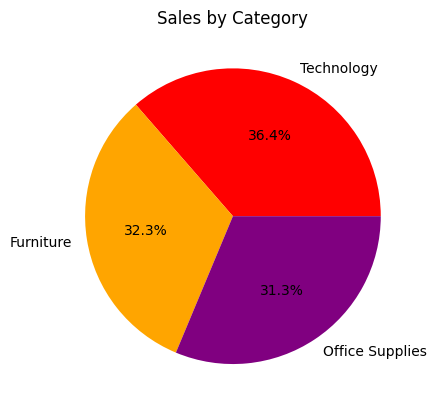

In [28]:
# Plot Profit with Pie chart
plt.pie(sales_cat_group["Sales"], labels=sales_cat_group["Category"], colors=['red', 'orange', 'purple'], autopct='%1.1f%%')
plt.title("Sales by Category")

Text(0.5, 1.0, 'Sales by Category')

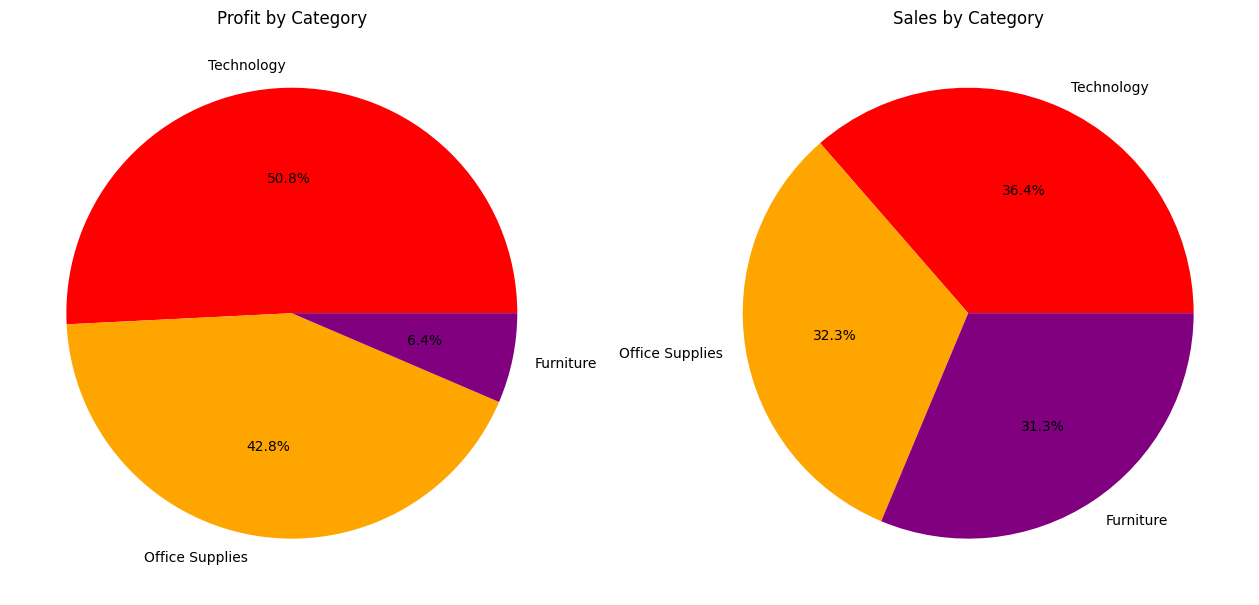

In [29]:
# We can put Profit and Sales pie chart side by side 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
# Plot Profit with Pie chart
ax[0].pie(profit_cat_group["Profit"], labels=profit_cat_group["Category"], colors=['red', 'orange', 'purple'], autopct='%1.1f%%')
ax[0].set_title("Profit by Category")
# Plot Profit with Pie chart
ax[1].pie(sales_cat_group["Sales"], labels=profit_cat_group["Category"], colors=['red', 'orange', 'purple'], autopct='%1.1f%%')
ax[1].set_title("Sales by Category")

### We can plot it with bar chart

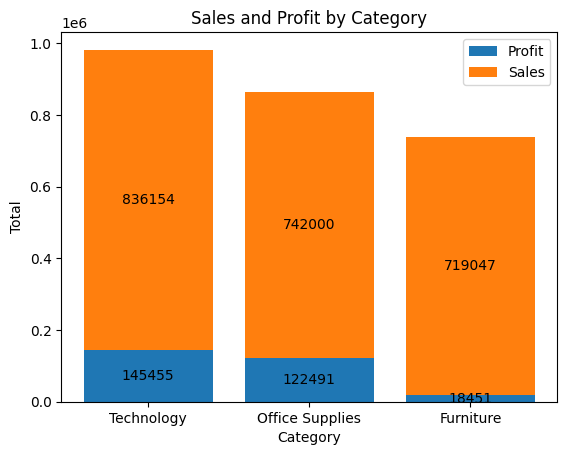

In [30]:
import numpy as np
# Set the positions of the bars on the x-axis
bar_positions = np.arange(len(profit_cat_group["Category"]))

# Create the stacked bar chart
bar_1 = plt.bar(bar_positions, profit_cat_group["Profit"], label='Profit')
# Add bar label
plt.bar_label(bar_1, fmt="%.0f", label_type="center")
bar_2 = plt.bar(bar_positions, sales_cat_group["Sales"], bottom=profit_cat_group["Profit"], label='Sales')
plt.bar_label(bar_2, fmt="%.0f", label_type="center")
# Customize the plot
plt.xlabel('Category')
plt.ylabel('Total')
plt.title('Sales and Profit by Category')
plt.xticks(bar_positions, profit_cat_group["Category"])
plt.legend()

# Display the plot
plt.show()

# Examine Profit by Sub-Category

In [31]:
profit_subcat_group = df.groupby('Sub-Category')['Profit'].sum().reset_index()
profit_subcat_group = profit_subcat_group.sort_values(by="Profit", ascending=False)
profit_subcat_group

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


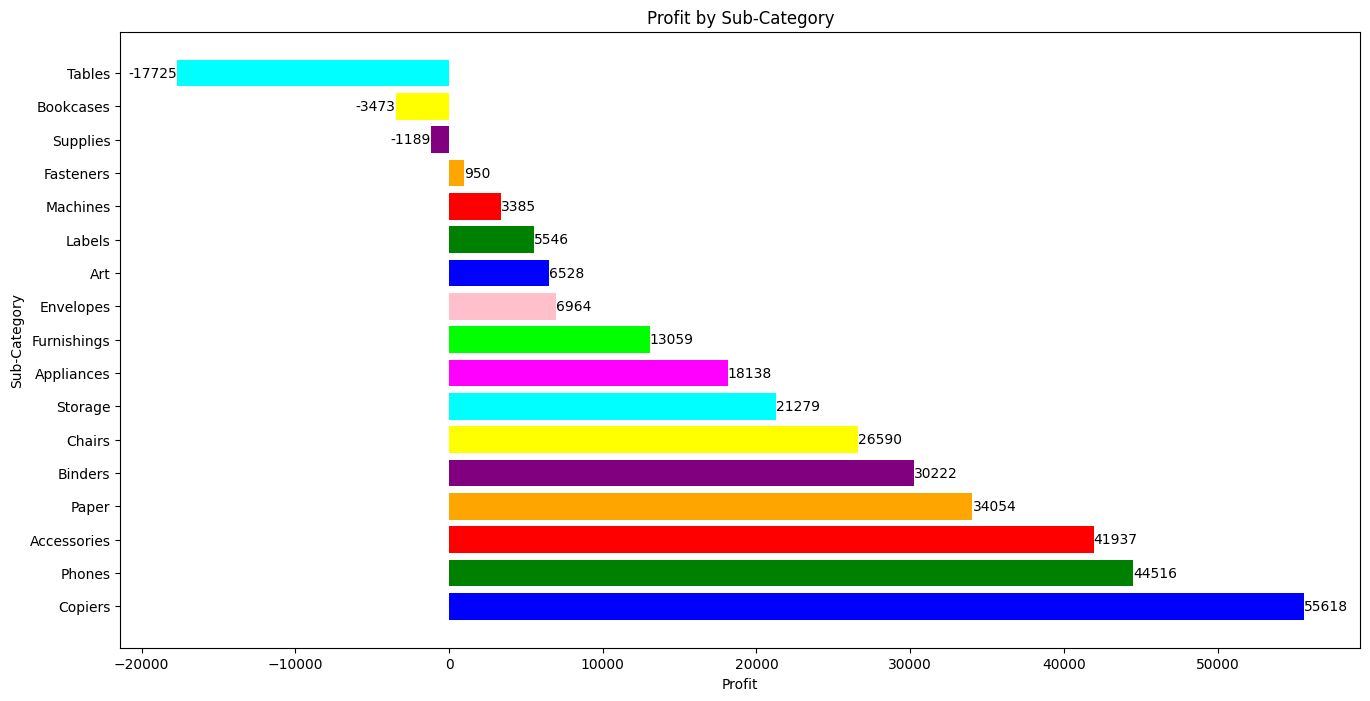

In [32]:
plt.figure(figsize=(16, 8))
bar_container = plt.barh(profit_subcat_group['Sub-Category'], profit_subcat_group['Profit'], color=colors)
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.title('Profit by Sub-Category')
plt.bar_label(bar_container, fmt="%.0f")
plt.show()

### The superstore has many stores in many region, state and city. 

### Examine Profit by Region

In [33]:
profit_region = df.groupby('Region')['Profit'].sum().reset_index()
profit_region = profit_region.sort_values(by="Profit", ascending=False)
profit_region

,Region,Profit
3,West,108418.4489
1,East,91522.7800
2,South,46749.4303
0,Central,39706.3625


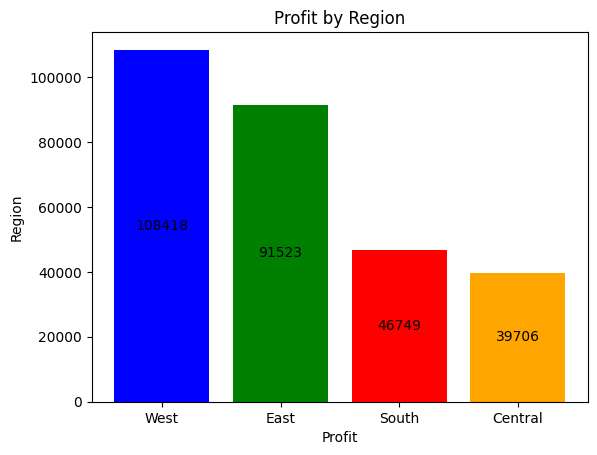

In [34]:

bar_container = plt.bar(profit_region['Region'], profit_region['Profit'], color=colors)
plt.xlabel('Profit')
plt.ylabel('Region')
plt.title('Profit by Region')
plt.bar_label(bar_container, fmt="%.0f", label_type="center")
plt.show()

In [35]:
profit_state = df.groupby('State')['Profit'].sum().reset_index()
profit_state = profit_state.sort_values(by="Profit", ascending=False)
profit_state

,State,Profit
3,California,76381.3871
30,New York,74038.5486
45,Washington,33402.6517
20,Michigan,24463.1876
44,Virginia,18597.9504
12,Indiana,18382.9363
9,Georgia,16250.0433
15,Kentucky,11199.6966
21,Minnesota,10823.1874
6,Delaware,9977.3748


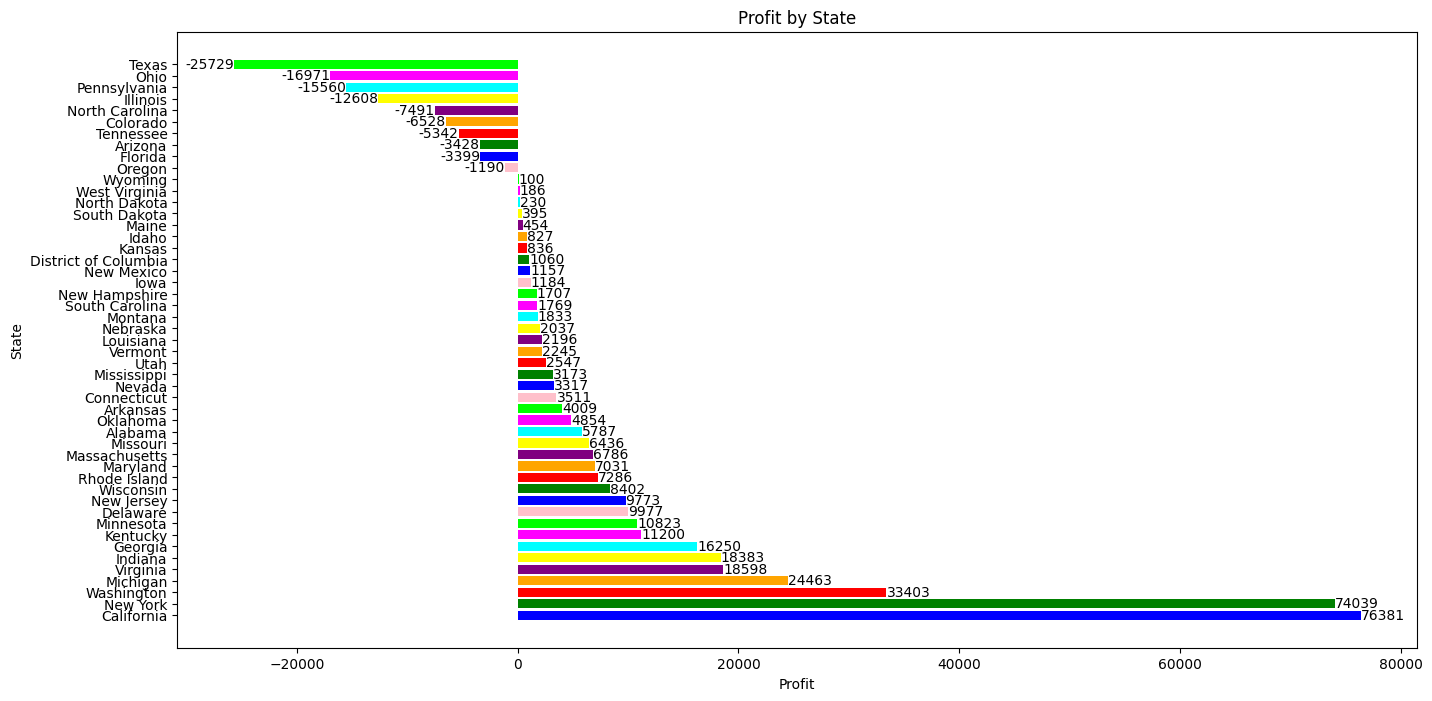

In [36]:
plt.figure(figsize=(16, 8))
bar_container = plt.barh(profit_state['State'], profit_state['Profit'], color=colors)
plt.xlabel('Profit')
plt.ylabel('State')
plt.title('Profit by State')
plt.bar_label(bar_container, fmt="%.0f")
plt.show()

In [37]:
# Filter the profit_state 
loss_profit_state = profit_state[profit_state["Profit"] < 0]

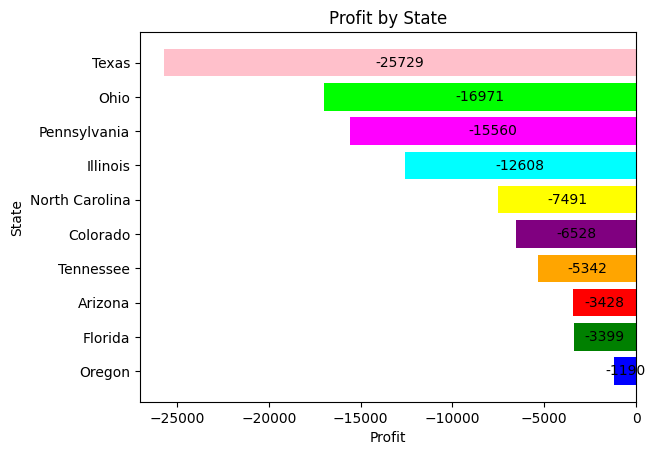

In [38]:
# plt.figure(figsize=(16, 8))
bar_container = plt.barh(loss_profit_state['State'], loss_profit_state['Profit'], color=colors)
plt.xlabel('Profit')
plt.ylabel('State')
plt.title('Profit by State')
plt.bar_label(bar_container, fmt="%.0f", label_type="center")
plt.show()

# WHY?

In [39]:
sale_region = df.groupby('Region')['Sales'].sum().reset_index()
sale_region = sale_region.sort_values(by="Sales", ascending=False)
sale_region

,Region,Sales
3,West,725457.8245
1,East,678781.2400
0,Central,501239.8908
2,South,391721.9050


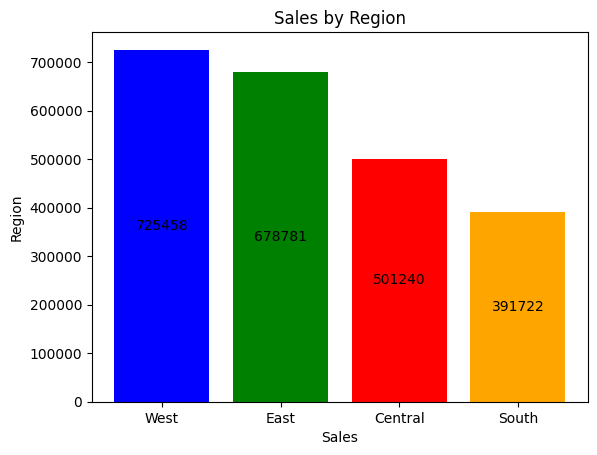

In [40]:
bar_container = plt.bar(sale_region['Region'], sale_region['Sales'], color=colors)
plt.xlabel('Sales')
plt.ylabel('Region')
plt.title('Sales by Region')
plt.bar_label(bar_container, fmt="%.0f", label_type="center")
plt.show()

Text(0.5, 1.0, 'Sales by Region')

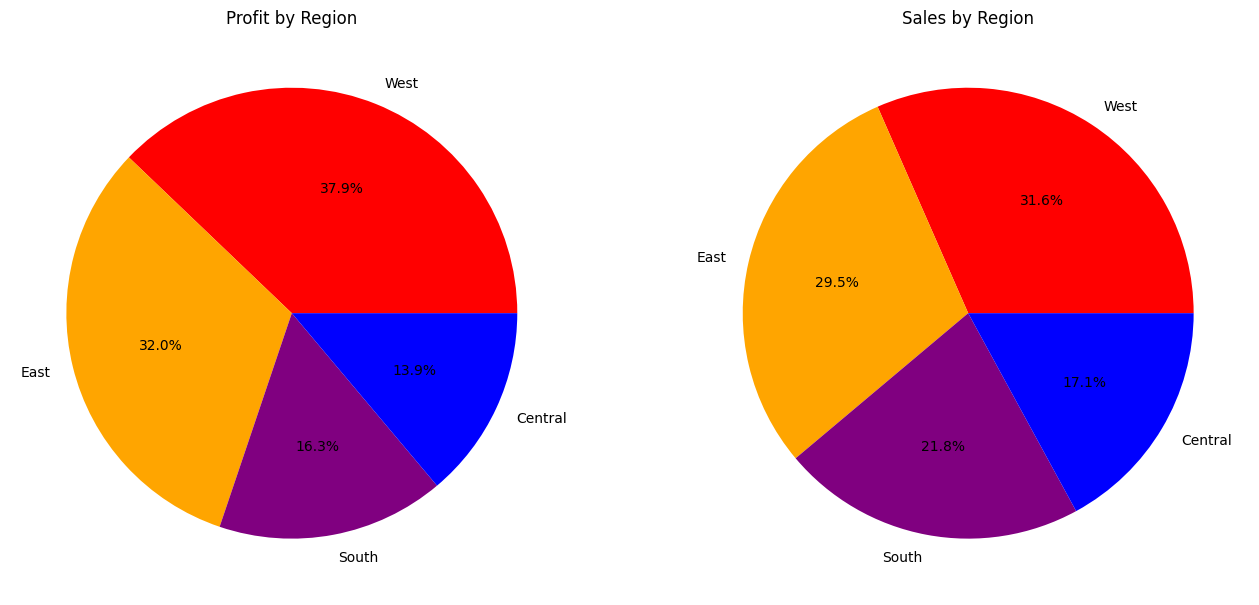

In [41]:
# We can put Profit and Sales pie chart side by side 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
# Plot Profit with Pie chart
ax[0].pie(profit_region["Profit"], labels=profit_region["Region"], colors=['red', 'orange', 'purple', 'blue'], autopct='%1.1f%%')
ax[0].set_title("Profit by Region")
# Plot Profit with Pie chart
ax[1].pie(sale_region["Sales"], labels=profit_region["Region"], colors=['red', 'orange', 'purple', 'blue'], autopct='%1.1f%%')
ax[1].set_title("Sales by Region")

### What is the conclusion?

### Examine the impact of Discount on Profit and Sale

In [42]:
discount_sale_profit = df[['Discount','Sales','Profit']]
discount_sale_profit = discount_sale_profit.groupby(['Discount']).mean().reset_index()


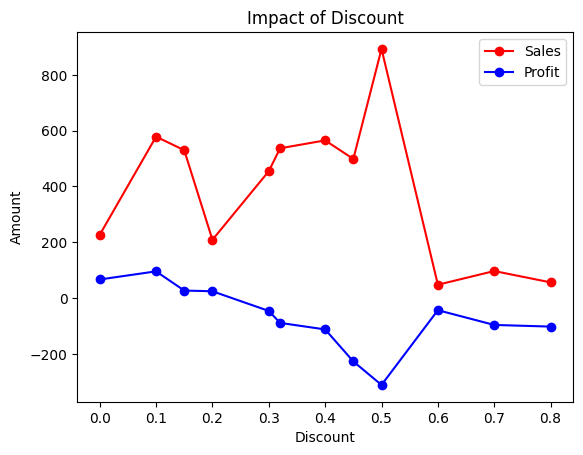

In [43]:
plt.plot(discount_sale_profit['Discount'], discount_sale_profit['Sales'], marker='o', color='red', label='Sales')
plt.plot(discount_sale_profit['Discount'], discount_sale_profit['Profit'], marker='o', color='blue', label='Profit')
plt.title("Impact of Discount")
plt.xlabel("Discount")
plt.ylabel("Amount")
plt.legend()

### Examine the impact of Ship Mode on Profit and Sale

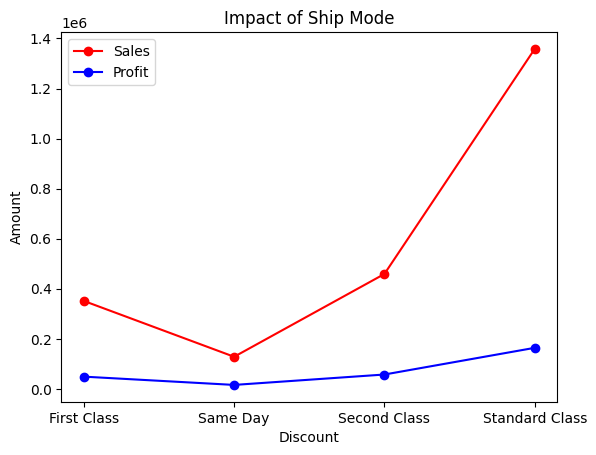

In [44]:
ship_sale_profit = df[['Ship Mode','Sales','Profit']]
ship_sale_profit = ship_sale_profit.groupby(['Ship Mode']).sum().reset_index()

plt.plot(ship_sale_profit['Ship Mode'], ship_sale_profit['Sales'], marker='o', color='red', label='Sales')
plt.plot(ship_sale_profit['Ship Mode'], ship_sale_profit['Profit'], marker='o', color='blue', label='Profit')
plt.title("Impact of Ship Mode")
plt.xlabel("Discount")
plt.ylabel("Amount")
plt.legend()


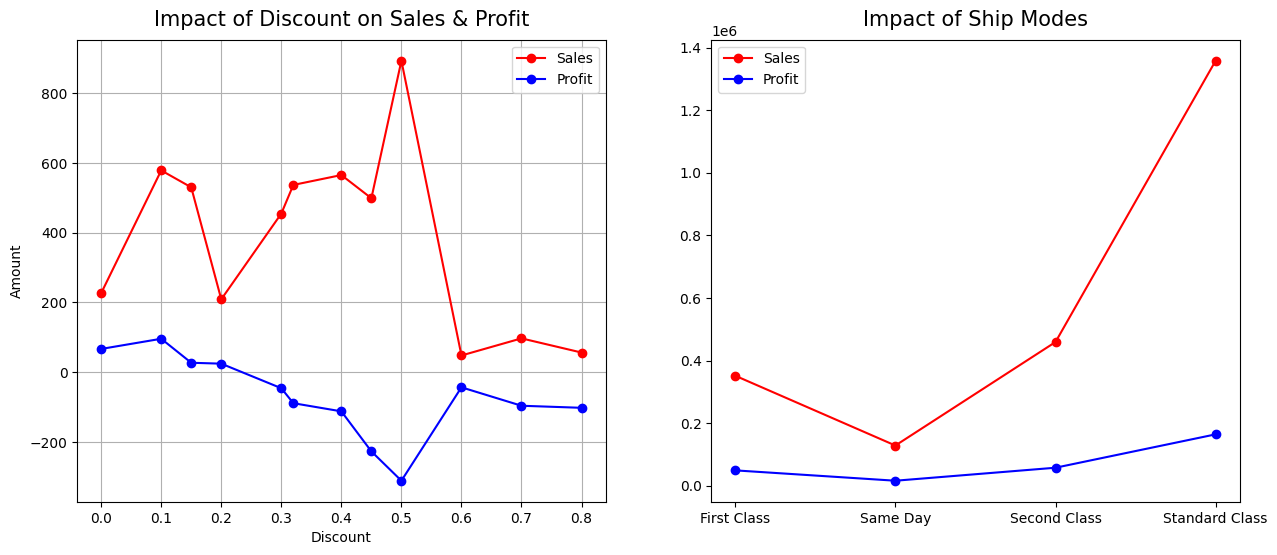

In [45]:

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

ax1 = axs[0]
ax1.plot(discount_sale_profit['Discount'], discount_sale_profit['Sales'], marker='o', color='red', label='Sales')
ax1.plot(discount_sale_profit['Discount'], discount_sale_profit['Profit'], marker='o', color='blue', label='Profit')
ax1.set_title("Impact of Discount on Sales & Profit", size=15, pad=10)
ax1.set_xlabel("Discount")
ax1.set_ylabel("Amount")
ax1.legend()
ax1.grid(True)

ax2 = axs[1]
ax2.plot(ship_sale_profit['Ship Mode'], ship_sale_profit['Sales'], marker='o', color='red', label='Sales')
ax2.plot(ship_sale_profit['Ship Mode'], ship_sale_profit['Profit'], marker='o', color='blue', label='Profit')
# ax2.bar(x=ship_sale_profit['Ship Mode'], height=ship_sale_profit['Sales'], color='red', label='Sales')
# ax2.bar(x=ship_sale_profit['Ship Mode'], height=ship_sale_profit['Profit'], bottom=ship_sale_profit['Sales'], color='blue', label='Profits')
ax2.set_title("Impact of Ship Modes", size=15, pad=10)
ax2.legend()

plt.show()


In [46]:
df["Price"] = df["Sales"]/df["Quantity"]

In [47]:
df_test = df[["Region", "Sub-Category", "Price"]]
df_group = df_test.groupby(["Region", "Sub-Category"], as_index=False).mean()
df_group.sort_values(by="Price", ascending=False)
df_group.head(10)


,Region,Sub-Category,Price
0,Central,Accessories,45.914404
1,Central,Appliances,51.656138
2,Central,Art,9.210068
3,Central,Binders,36.264492
4,Central,Bookcases,125.103392
5,Central,Chairs,134.923416
6,Central,Copiers,623.741125
7,Central,Envelopes,21.654508
8,Central,Fasteners,3.348073
9,Central,Furnishings,18.654059


# Heat map

In [48]:
quantitative_df = df[["Price", "Sales", "Quantity", "Discount", "Profit"]]
corr_matrix = quantitative_df.corr()
corr_matrix

,Price,Sales,Quantity,Discount,Profit
Price,1.000000,0.889376,-0.003148,-0.032803,0.468312
Sales,0.889376,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.003148,0.200795,1.000000,0.008623,0.066253
Discount,-0.032803,-0.028190,0.008623,1.000000,-0.219487
Profit,0.468312,0.479064,0.066253,-0.219487,1.000000


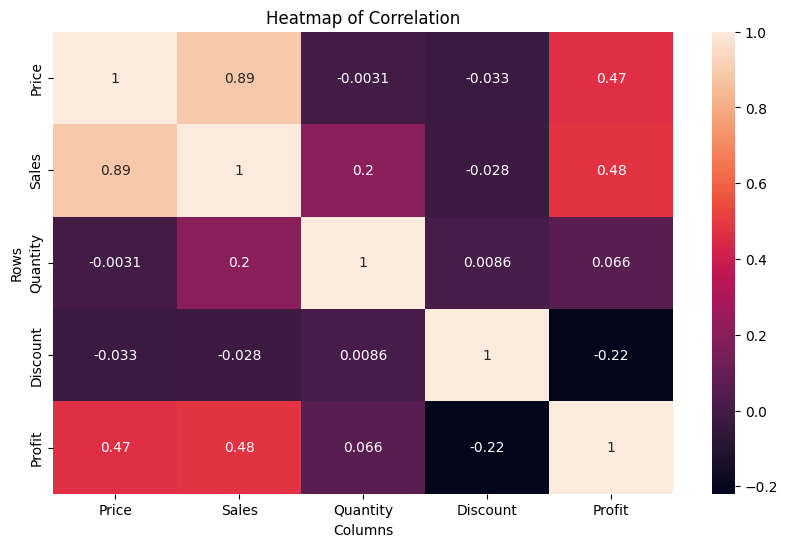

In [49]:
# Plot the correlation heatmap
quantitative_df = df[["Price", "Sales", "Quantity", "Discount", "Profit"]]
corr_matrix = quantitative_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True)

# Customize the plot
plt.title('Heatmap of Correlation')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

# Further discussion?